In [1]:
import pandas as pd

In [2]:
d=pd.read_csv(r"C:\Users\Aditi\Downloads\data.csv")

In [3]:
d.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,3D_available,Time_taken,Twitter_hastags,Genre,Avg_age_actors,Num_multiplex,Collection,Tech_Oscar
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,YES,109.60,223.840,Thriller,23,494,48000,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,NO,146.64,243.456,Drama,42,462,43200,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,NO,147.88,2022.400,Comedy,38,458,69400,1
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,YES,185.36,225.344,Drama,45,472,66800,1
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,NO,176.48,225.792,Drama,55,395,72400,1


In [4]:
d.isna().sum()

Marketing expense       0
Production expense      0
Multiplex coverage      0
Budget                 12
Movie_length            0
Lead_ Actor_Rating      0
Lead_Actress_rating     5
Director_rating         0
Producer_rating         0
Critic_rating           2
Trailer_views           0
3D_available            5
Time_taken             12
Twitter_hastags         0
Genre                   0
Avg_age_actors          0
Num_multiplex           0
Collection              0
Tech_Oscar              0
dtype: int64

In [5]:
d.loc[d.Budget.isna()==True, 'Budget']=d.Budget.mean()

In [6]:
d.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,3D_available,Time_taken,Twitter_hastags,Genre,Avg_age_actors,Num_multiplex,Collection,Tech_Oscar
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,YES,109.60,223.840,Thriller,23,494,48000,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,NO,146.64,243.456,Drama,42,462,43200,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,NO,147.88,2022.400,Comedy,38,458,69400,1
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,YES,185.36,225.344,Drama,45,472,66800,1
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,NO,176.48,225.792,Drama,55,395,72400,1


In [7]:
d.loc[d.Lead_Actress_rating.isna()==True, 'Lead_Actress_rating']=d.Lead_Actress_rating.mean()
d.loc[d.Critic_rating.isna()==True, 'Critic_rating']=d.Critic_rating.mean() 
d.loc[d.Time_taken.isna()==True, 'Time_taken']=d.Time_taken.mean()

In [8]:
d.isna().sum()

Marketing expense      0
Production expense     0
Multiplex coverage     0
Budget                 0
Movie_length           0
Lead_ Actor_Rating     0
Lead_Actress_rating    0
Director_rating        0
Producer_rating        0
Critic_rating          0
Trailer_views          0
3D_available           5
Time_taken             0
Twitter_hastags        0
Genre                  0
Avg_age_actors         0
Num_multiplex          0
Collection             0
Tech_Oscar             0
dtype: int64

In [9]:
d.fillna(value={'3D_available' : d['3D_available'].mode()[0]}, inplace=True) #filling null categorical variables with mode

In [10]:
d['3D_available'].mode()

0    YES
Name: 3D_available, dtype: object

In [11]:
d.isna().sum()

Marketing expense      0
Production expense     0
Multiplex coverage     0
Budget                 0
Movie_length           0
Lead_ Actor_Rating     0
Lead_Actress_rating    0
Director_rating        0
Producer_rating        0
Critic_rating          0
Trailer_views          0
3D_available           0
Time_taken             0
Twitter_hastags        0
Genre                  0
Avg_age_actors         0
Num_multiplex          0
Collection             0
Tech_Oscar             0
dtype: int64

In [12]:
d.duplicated().sum()

7

In [13]:
d = d.drop_duplicates(keep='first')

In [14]:
d.duplicated().sum()

0

In [15]:
encode_num = {"3D_available":{"NO":0,"YES":1}, "Genre":{"Thriller":3,"Drama":2,"Comedy":1,"Action":0}} #one hot encoding, conv cat to num data
d=d.replace(encode_num)

In [16]:
d.head(10)

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,3D_available,Time_taken,Twitter_hastags,Genre,Avg_age_actors,Num_multiplex,Collection,Tech_Oscar
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095000,7.910,7.995,7.94,527367,1,109.60,223.840,3,23,494,48000,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650000,7.440,7.470,7.44,494055,0,146.64,243.456,2,42,462,43200,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570000,7.495,7.515,7.44,547051,0,147.88,2022.400,1,38,458,69400,1
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035000,6.920,7.020,8.26,516279,1,185.36,225.344,2,45,472,66800,1
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070000,6.815,7.070,8.26,531448,0,176.48,225.792,2,55,395,72400,1
5,20.5970,59.36,0.542,35718.650,132.2,6.890,7.100000,6.885,7.005,7.26,498425,1,143.48,284.592,1,53,460,57400,0
6,21.7658,70.74,0.476,33396.660,140.1,7.065,7.265000,7.150,7.400,8.96,459241,1,139.16,243.664,3,41,522,45800,0
7,22.8910,70.74,0.476,34285.460,169.6,6.980,8.181585,6.875,7.170,7.96,400821,0,116.84,243.536,2,56,571,44200,0
8,24.2248,70.74,0.476,31280.205,173.5,6.910,7.075000,6.850,7.000,7.96,295168,1,118.60,242.640,1,55,564,33000,1
9,23.4008,70.74,0.476,33352.220,159.4,6.665,6.725000,6.575,6.855,7.96,412012,1,189.56,283.024,3,45,508,37800,1


In [17]:
d['Genre'].value_counts()

3    183
1    155
2     97
0     71
Name: Genre, dtype: int64

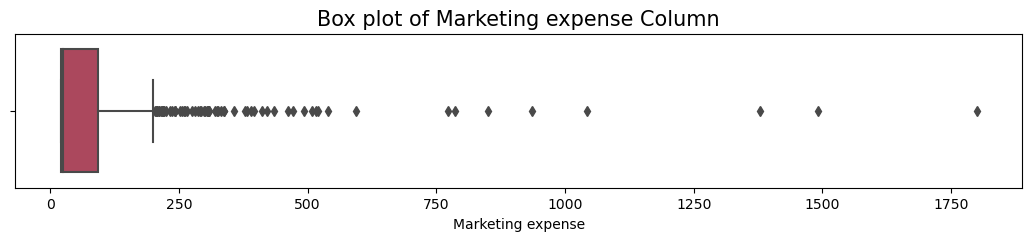

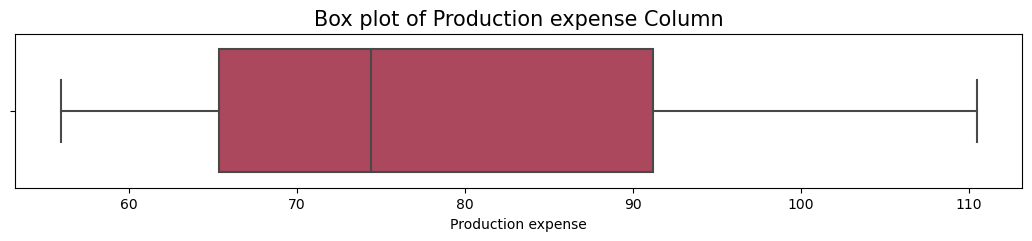

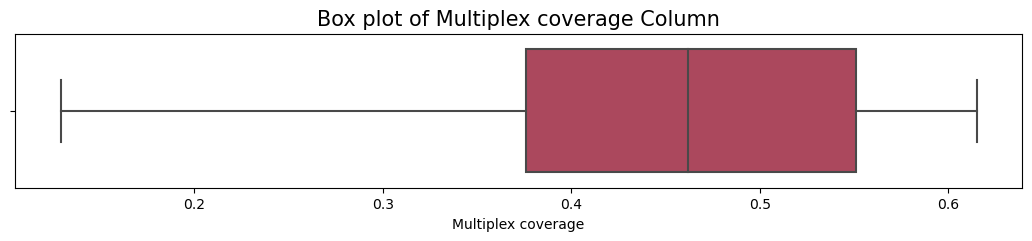

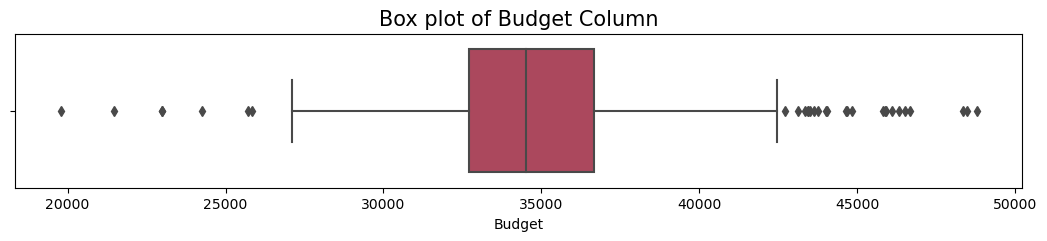

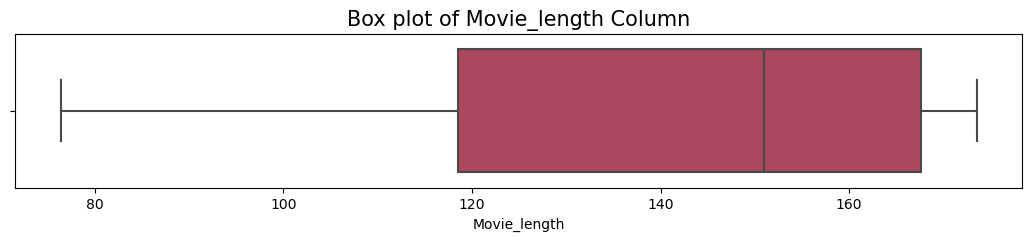

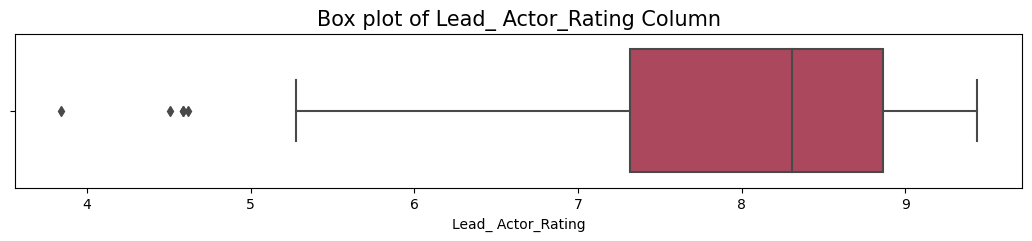

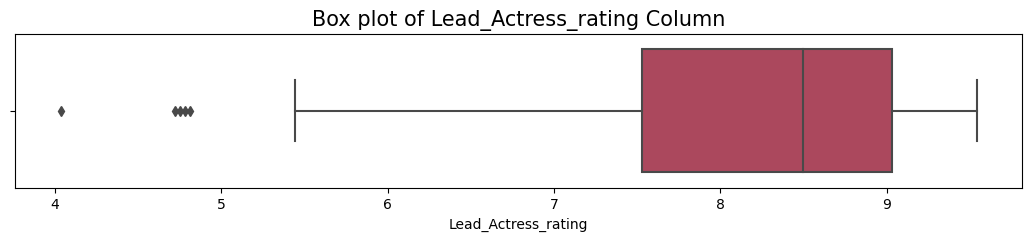

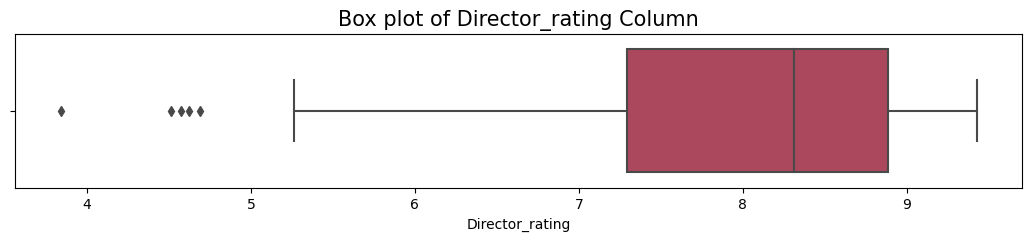

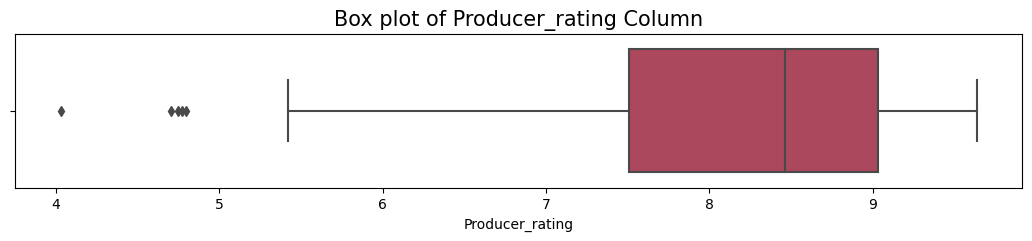

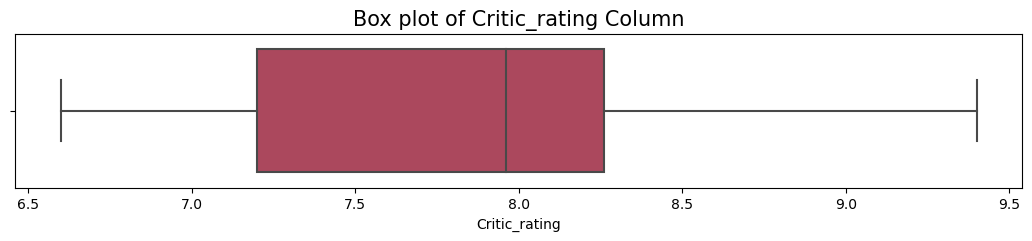

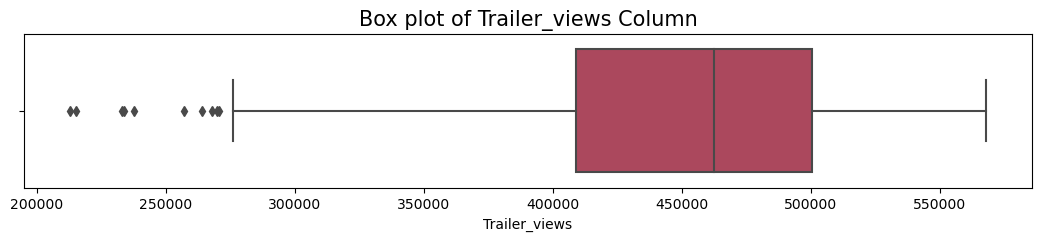

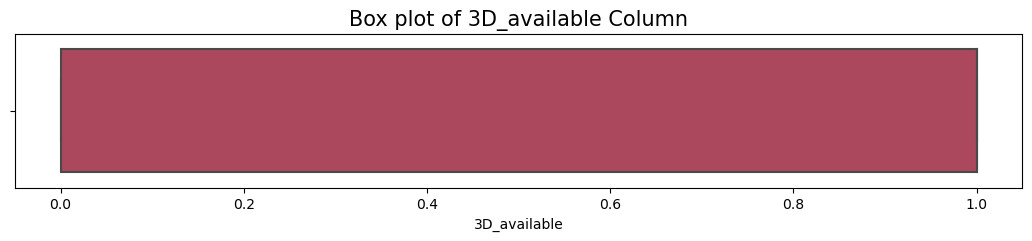

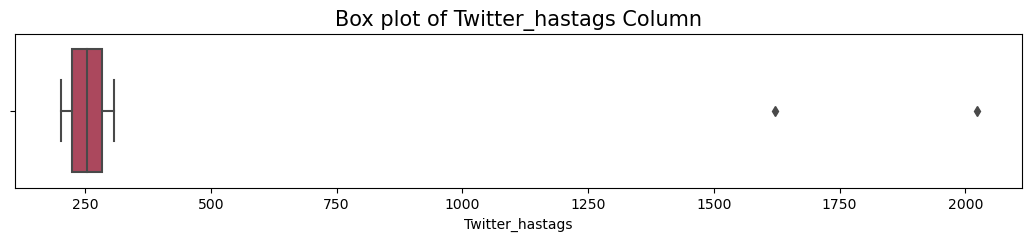

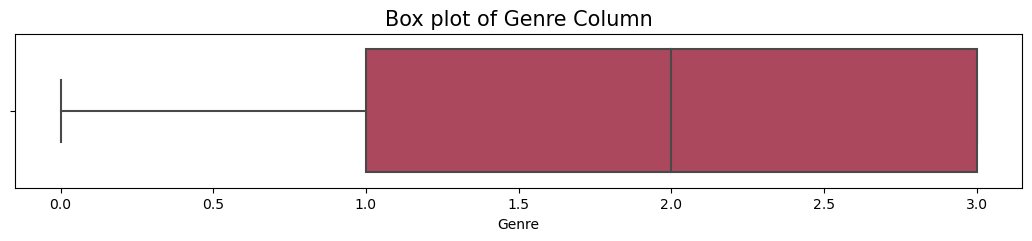

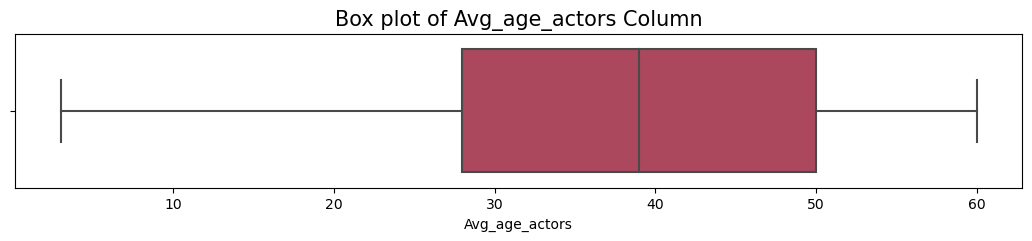

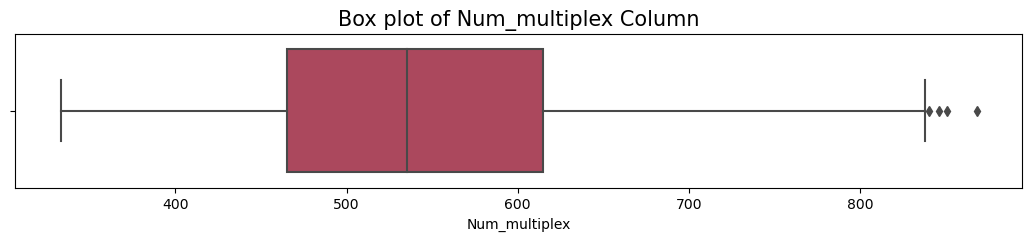

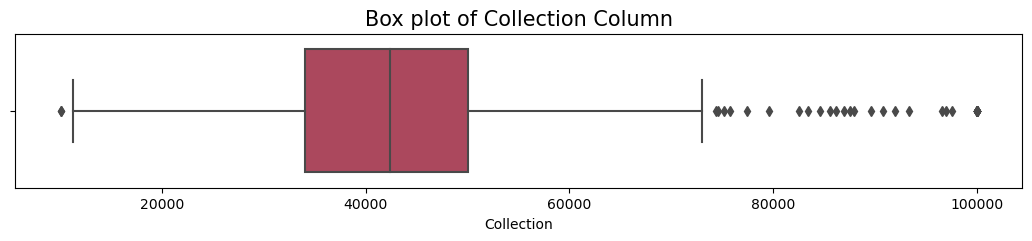

In [18]:
#outliers
import seaborn as sns
import matplotlib.pyplot as plt
cols = ['Marketing expense','Production expense','Multiplex coverage',
       'Budget', 'Movie_length', 'Lead_ Actor_Rating', 'Lead_Actress_rating',
       'Director_rating', 'Producer_rating', 'Critic_rating', 'Trailer_views',
       '3D_available', 'Twitter_hastags', 'Genre','Avg_age_actors','Num_multiplex','Collection']

for col in cols:

    plt.figure(figsize=(13, 2))
    sns.boxplot(x=d[col],palette='inferno')
    plt.title(f'Box plot of {col} Column', fontsize=15 )

In [19]:
#identify outliers

for col in cols:
    # Access the column data
    column = d[col]
    
    # Calculate the quartiles
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    # Calculate the IQR (Interquartile Range)
    IQR = Q3 - Q1
    
    # Calculate the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify the outliers in the column
    outliers = column[(column < lower_bound) | (column > upper_bound)]
    
    # Calculate the number of outliers
    num_outliers = len(outliers)
    
    # Print the number of outliers in the current column
    print(f"Column '{col}' has {num_outliers} outliers.")

Column 'Marketing expense' has 66 outliers.
Column 'Production expense' has 0 outliers.
Column 'Multiplex coverage' has 0 outliers.
Column 'Budget' has 30 outliers.
Column 'Movie_length' has 0 outliers.
Column 'Lead_ Actor_Rating' has 5 outliers.
Column 'Lead_Actress_rating' has 5 outliers.
Column 'Director_rating' has 5 outliers.
Column 'Producer_rating' has 5 outliers.
Column 'Critic_rating' has 0 outliers.
Column 'Trailer_views' has 10 outliers.
Column '3D_available' has 0 outliers.
Column 'Twitter_hastags' has 2 outliers.
Column 'Genre' has 0 outliers.
Column 'Avg_age_actors' has 0 outliers.
Column 'Num_multiplex' has 4 outliers.
Column 'Collection' has 39 outliers.


In [20]:
#Outliers in features like Marketing expense or Budget might be influential in understanding the marketing strategies and financial decisions.
#did not remove outliers because it was reducing the data to almost half(i.e about 250)

In [21]:
d['Tech_Oscar'].value_counts() #data is already balanced, hence did not use techniques like SMOTE

1    276
0    230
Name: Tech_Oscar, dtype: int64

<AxesSubplot:>

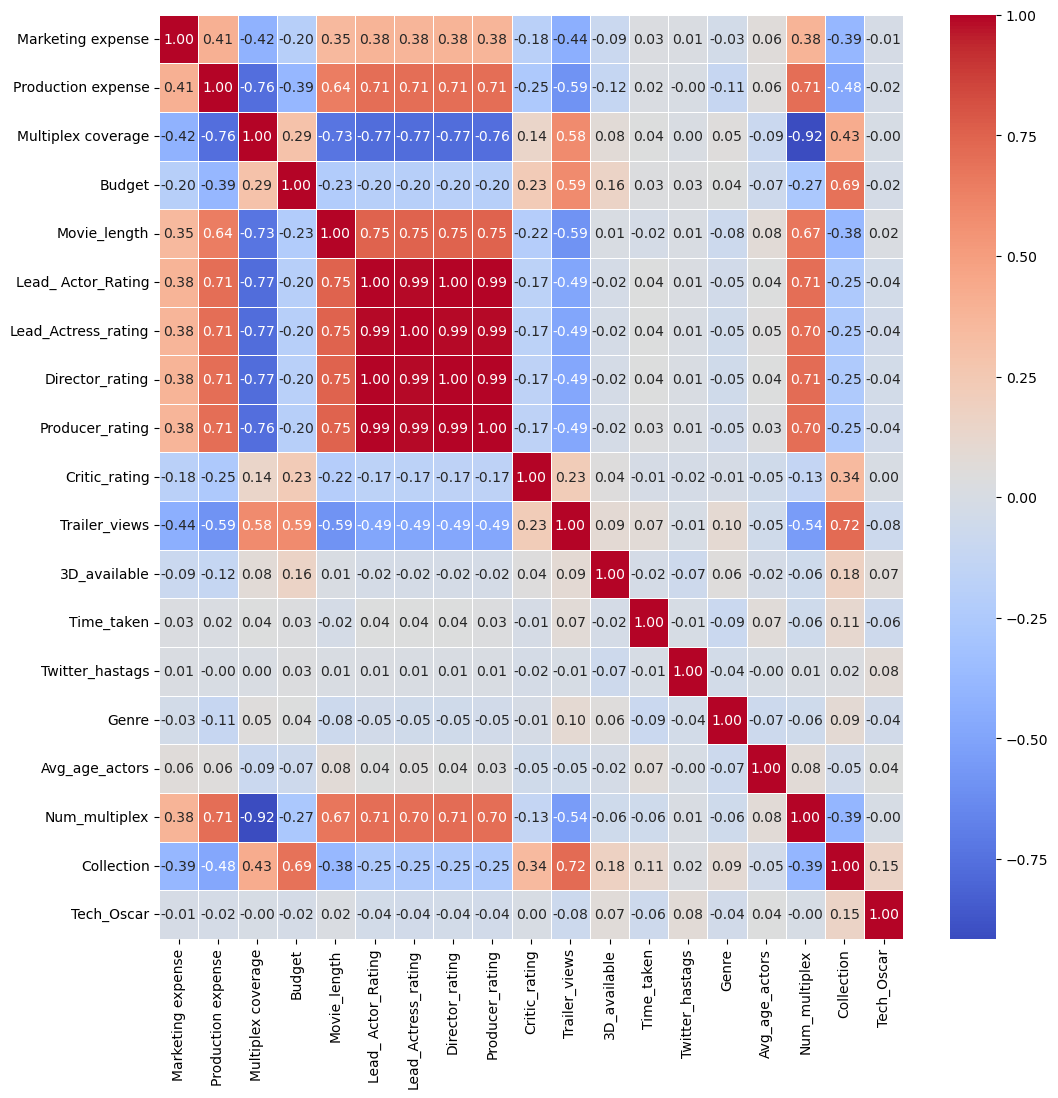

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

cm = d.corr()
plt.figure(figsize=(12, 12))
sns.heatmap(cm, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

In [23]:
d['Tech_Oscar'].value_counts() #checking for balanced data

1    276
0    230
Name: Tech_Oscar, dtype: int64

In [24]:
d.shape #since we removed 7 duplicates

(506, 19)

In [38]:
x = d.loc[:,d.columns != 'Tech_Oscar']
y = d['Tech_Oscar']


In [39]:
#importing libraries for data transformation
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() #standardisation 
xts = scaler.fit_transform(x)

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(xts, y, test_size=0.2, random_state=42)


In [41]:
print("Samples in Training data ", len(X_train))
print("Samples in Testing data ", len(X_test))

Samples in Training data  404
Samples in Testing data  102


In [42]:
#importing models and evaluation metrics
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc

In [43]:
#logistic regression
logi = LogisticRegression(fit_intercept=True, max_iter=10000)
logi.fit(X_train, y_train)
y_pred_logi = logi.predict(X_test)
y_train_pred_logi=logi.predict(X_train)

#getting all score for logistic regression
train_accuracy_logi = round(accuracy_score(y_train_pred_logi,y_train), 3)
accuracy_logi = round(accuracy_score(y_pred_logi,y_test), 3)
precision_score_logi = round(precision_score(y_pred_logi,y_test), 3)
recall_score_logi = round(recall_score(y_pred_logi,y_test), 3)
f1_score_logi = round(f1_score(y_pred_logi,y_test), 3)
roc_score_logi = round(roc_auc_score(y_pred_logi,y_test), 3)

print("The accuracy on train data is ", train_accuracy_logi)
print("The accuracy on test data is ", accuracy_logi)
print("The precision on test data is ", precision_score_logi)
print("The recall on test data is ", recall_score_logi)
print("The f1 on test data is ", f1_score_logi)
print("The roc_score on test data is ", roc_score_logi)

labels = ['No tech_oscar', 'tech_Oscar']
cm_logi = confusion_matrix(y_test, y_pred_logi )
print(cm_logi)

The accuracy on train data is  0.663
The accuracy on test data is  0.667
The precision on test data is  0.633
The recall on test data is  0.76
The f1 on test data is  0.691
The roc_score on test data is  0.668
[[30 12]
 [22 38]]


In [44]:
#decission tree
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred_dtc = dtc.predict(X_test)
y_train_pred_dtc=dtc.predict(X_train)

#getting all scores for Decision Tree Classifier
train_accuracy_dtc = round(accuracy_score(y_train_pred_dtc,y_train), 3)
accuracy_dtc = round(accuracy_score(y_pred_dtc,y_test), 3)
precision_score_dtc = round(precision_score(y_pred_dtc,y_test), 3)
recall_score_dtc = round(recall_score(y_pred_dtc,y_test), 3)
f1_score_dtc = round(f1_score(y_pred_dtc,y_test), 3)
roc_score_dtc = round(roc_auc_score(y_pred_dtc,y_test), 3)

print("The accuracy on train data is ", train_accuracy_dtc)
print("The accuracy on test data is ", accuracy_dtc)
print("The precision on test data is ", precision_score_dtc)
print("The recall on test data is ", recall_score_dtc)
print("The f1 on test data is ", f1_score_dtc)
print("The roc_score on test data is ", roc_score_dtc)
cm_dt = confusion_matrix(y_test, y_pred_dtc )
print(cm_dt)

The accuracy on train data is  1.0
The accuracy on test data is  0.549
The precision on test data is  0.567
The recall on test data is  0.63
The f1 on test data is  0.596
The roc_score on test data is  0.544
[[22 20]
 [26 34]]


In [45]:
rfc=RandomForestClassifier(n_estimators=75)
rfc.fit(X_train, y_train)
y_pred_rfc=rfc.predict(X_test)
y_train_pred_rfc=rfc.predict(X_train)

#getting all scores for Random Forest Classifier
train_accuracy_rfc = round(accuracy_score(y_train_pred_rfc,y_train), 3)
accuracy_rfc = round(accuracy_score(y_pred_rfc,y_test), 3)
precision_score_rfc = round(precision_score(y_pred_rfc,y_test), 3)
recall_score_rfc = round(recall_score(y_pred_rfc,y_test), 3)
f1_score_rfc = round(f1_score(y_pred_rfc,y_test), 3)
roc_score_rfc = round(roc_auc_score(y_pred_rfc,y_test), 3)

print("The accuracy on train data is ", train_accuracy_rfc)
print("The accuracy on test data is ", accuracy_rfc)
print("The precision on test data is ", precision_score_rfc)
print("The recall on test data is ", recall_score_rfc)
print("The f1 on test data is ", f1_score_rfc)
print("The roc_score on test data is ", roc_score_rfc)
cm_rfc = confusion_matrix(y_test, y_pred_rfc )
print(cm_rfc)


The accuracy on train data is  1.0
The accuracy on test data is  0.647
The precision on test data is  0.683
The recall on test data is  0.707
The f1 on test data is  0.695
The roc_score on test data is  0.638
[[25 17]
 [19 41]]


In [46]:
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred_xgb=xgb.predict(X_test)
y_train_pred_xgb=xgb.predict(X_train)

#getting all scores for XG Boosting Classifier
train_accuracy_xgb = round(accuracy_score(y_train_pred_xgb,y_train), 3)
accuracy_xgb = round(accuracy_score(y_pred_xgb,y_test), 3)
precision_score_xgb = round(precision_score(y_pred_xgb,y_test), 3)
recall_score_xgb = round(recall_score(y_pred_xgb,y_test), 3)
f1_score_xgb = round(f1_score(y_pred_xgb,y_test), 3)
roc_score_xgb = round(roc_auc_score(y_pred_xgb,y_test), 3)

print("The accuracy on train data is ", train_accuracy_xgb)
print("The accuracy on test data is ", accuracy_xgb)
print("The precision on test data is ", precision_score_xgb)
print("The recall on test data is ", recall_score_xgb)
print("The f1 on test data is ", f1_score_xgb)
print("The roc_score on test data is ", roc_score_xgb)
cm_xgb = confusion_matrix(y_test, y_pred_xgb )
print(cm_xgb)

The accuracy on train data is  1.0
The accuracy on test data is  0.647
The precision on test data is  0.717
The recall on test data is  0.694
The f1 on test data is  0.705
The roc_score on test data is  0.634
[[23 19]
 [17 43]]


In [47]:
gbc = GradientBoostingClassifier(random_state=42)
gbc.fit(X_train, y_train)
y_pred_gbc=gbc.predict(X_test)
y_train_pred_gbc=gbc.predict(X_train)

#getting all scores for Gradient Boosting Classifier
train_accuracy_gbc = round(accuracy_score(y_train_pred_gbc,y_train), 3)
accuracy_gbc = round(accuracy_score(y_pred_gbc,y_test), 3)
precision_score_gbc = round(precision_score(y_pred_gbc,y_test), 3)
recall_score_gbc = round(recall_score(y_pred_gbc,y_test), 3)
f1_score_gbc = round(f1_score(y_pred_gbc,y_test), 3)
roc_score_gbc = round(roc_auc_score(y_pred_gbc,y_test), 3)

print("The accuracy on train data is ", train_accuracy_gbc)
print("The accuracy on test data is ", accuracy_gbc)
print("The precision on test data is ", precision_score_gbc)
print("The recall on test data is ", recall_score_gbc)
print("The f1 on test data is ", f1_score_gbc)
print("The roc_score on test data is ", roc_score_gbc)

cm_gbc = confusion_matrix(y_test, y_pred_gbc )
print(cm_gbc)

The accuracy on train data is  0.983
The accuracy on test data is  0.637
The precision on test data is  0.667
The recall on test data is  0.702
The f1 on test data is  0.684
The roc_score on test data is  0.629
[[25 17]
 [20 40]]


In [48]:
all_classifiers = ['Logistic Regression', 'Decision Tree', 'Random Forest',  'Gradient Boosting', 'XG Boosting']
all_train_accuracy = [train_accuracy_logi, train_accuracy_dtc, train_accuracy_rfc, train_accuracy_gbc, train_accuracy_xgb]
all_test_accuracy = [accuracy_logi, accuracy_dtc, accuracy_rfc,  accuracy_gbc, accuracy_xgb]
all_precision_score = [precision_score_logi, precision_score_dtc, precision_score_rfc, precision_score_gbc, precision_score_xgb]
all_recall_score = [recall_score_logi, recall_score_dtc, recall_score_rfc,  recall_score_gbc, recall_score_xgb]
all_f1_score = [f1_score_logi, f1_score_dtc, f1_score_rfc, f1_score_gbc, f1_score_xgb]
all_auc_score = [roc_score_logi, roc_score_dtc, roc_score_rfc, roc_score_gbc, roc_score_xgb]

In [49]:
compare_df = pd.DataFrame({'Classifier':all_classifiers, 'Train Accuracy': all_train_accuracy, 'Test Accuracy': all_test_accuracy, 'Precision': all_precision_score, 'Recall': all_recall_score, 'F1 Score': all_f1_score , 'AUC': all_auc_score})

In [50]:
compare_df.sort_values(by=['Test Accuracy'], ascending=False)

,Classifier,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score,AUC
0,Logistic Regression,0.663,0.667,0.633,0.760,0.691,0.668
2,Random Forest,1.000,0.647,0.683,0.707,0.695,0.638
4,XG Boosting,1.000,0.647,0.717,0.694,0.705,0.634
3,Gradient Boosting,0.983,0.637,0.667,0.702,0.684,0.629
1,Decision Tree,1.000,0.549,0.567,0.630,0.596,0.544
